In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display


import warnings
warnings.filterwarnings("ignore")


In [2]:
%matplotlib inline
plt.style.use('seaborn-notebook')
plt.rcParams["figure.figsize"] = (20, 3)
pd.options.display.float_format = '{:20,.4f}'.format
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set(context="paper", font="monospace")

In [3]:
def quality_report(df):
    """
    Description: Displays quality of data in terms of missing values, unique numbers, datatypes etc.
    Arguments: Dataframe
    """
    dtypes = df.dtypes
    nuniq = df.T.apply(lambda x: x.nunique(), axis=1)
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    quality_df  = pd.concat([total, percent, nuniq, dtypes], axis=1, keys=['Total', 'Percent','Nunique', 'Dtype'])
    display(quality_df)


def object_count_plot(df):
    """
    Description : Plot countplot for all categorical features present in the dataframe passed
    Argument : Dataframe
    """
    
    for var in df.columns:
        if df[var].dtype == 'object':
            print(df[var].value_counts())
            plt.figure(figsize=(12,5))
            g = sns.countplot(x=var,data=df)
            g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
            plt.tight_layout()
            plt.show()
            
def numeric_distribution_plot(df):
    """
    Description : Gives distribution plot for all the numeric features in the dataframe passed
    Argument : Dataframe
    """
    for col in df.columns:
        if df[col].dtype != 'object':
            print(df[col].describe())
            plt.figure(figsize=(12,5))
            plt.title("Distribution of "+col)
            ax = sns.distplot(df[col].dropna())
            plt.tight_layout()
            plt.show()

In [6]:
train = pd.read_csv('Train(1).csv')
test = pd.read_csv('Test(1).csv')
sub = pd.read_csv('sample_submission(2).csv')

In [7]:
train.set_index('user_id', inplace = True)
test.set_index('user_id',inplace=True)

In [9]:
print("train shape is= ",train.shape)
print("test shape is = ",test.shape)
print("Sample sub shape is = ",sub.shape)

train shape is=  (400000, 18)
test shape is =  (100000, 17)
Sample sub shape is =  (100000, 2)


In [10]:
train.sample(5)

,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
user_id,,,,,,,,,,,,,,,,,,
c99676ab1d1dc69138e8e7f5e3b6b9e4f2563858,DIOURBEL,K > 24 month,950.0000,4.0000,950.0000,317.0000,4.0000,0.0000,1.0000,3.0000,4.0000,nan,nan,NO,49,NaN,nan,0
e8bd4fb360d3bfcbd84710266a0b63ccfce7b85a,NaN,K > 24 month,500.0000,1.0000,nan,nan,nan,nan,nan,nan,nan,nan,nan,NO,1,NaN,nan,1
28c6bedfa9846edbe98137e48c454556bc4610bd,NaN,K > 24 month,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NO,2,NaN,nan,1
0642bb39b11e078290c9e1f52da381b2e60dd4c1,DAKAR,K > 24 month,"8,450.0000",29.0000,"8,078.0000","2,693.0000",32.0000,"1,159.0000",532.0000,114.0000,43.0000,nan,3.0000,NO,60,Mixt 250F=Unlimited_call24H,10.0000,0
3525df3a3e234546a5c0af4a6b2d3cb34d462cd2,NaN,K > 24 month,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NO,1,NaN,nan,1


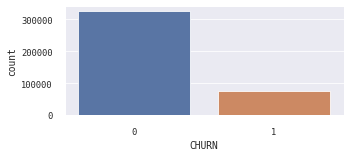

In [11]:
plt.figure(figsize=(5,2))
sns.countplot(x='CHURN',data=train)
plt.show()

In [12]:
train['CHURN'].value_counts(normalize = True) * 100

0                81.2890
1                18.7110
Name: CHURN, dtype: float64

In [14]:
train.columns

Index(['REGION', 'TENURE', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE',
       'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO',
       'ZONE1', 'ZONE2', 'MRG', 'REGULARITY', 'TOP_PACK', 'FREQ_TOP_PACK',
       'CHURN'],
      dtype='object')

In [15]:
test.columns

Index(['REGION', 'TENURE', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE',
       'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO',
       'ZONE1', 'ZONE2', 'MRG', 'REGULARITY', 'TOP_PACK', 'FREQ_TOP_PACK'],
      dtype='object')

In [16]:
quality_report(train)

,Total,Percent,Nunique,Dtype
ARPU_SEGMENT,134663,33.6658,11014,float64
CHURN,0,0.0000,2,int64
DATA_VOLUME,196854,49.2135,22229,float64
FREQUENCE,134663,33.6658,91,float64
FREQUENCE_RECH,140277,35.0693,111,float64
FREQ_TOP_PACK,167329,41.8323,170,float64
MONTANT,140277,35.0693,2421,float64
MRG,0,0.0000,1,object
ON_NET,145819,36.4548,5996,float64
ORANGE,166317,41.5793,2072,float64


In [17]:
train['MRG'].value_counts()
train.drop(['ZONE1', 'ZONE2','MRG'], axis = 1, inplace = True)
test.drop(['ZONE1', 'ZONE2', 'MRG'], axis = 1, inplace = True)


In [18]:
test['CHURN'] = 'test'

In [19]:
data = pd.concat([train, test]).reset_index(drop=True)

In [20]:
data.shape, train.shape, test.shape

((500000, 15), (400000, 15), (100000, 15))

In [21]:
missing_col = data.columns[data.isna().any()]

In [22]:
missing_col

Index(['REGION', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT',
       'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'TOP_PACK',
       'FREQ_TOP_PACK'],
      dtype='object')

In [25]:
for col in missing_col.drop(['REGION', 'TOP_PACK']):
    data[col].fillna(data[col].median(), inplace = True)

In [26]:
for col in [ 'TOP_PACK', 'REGION']:
    
    data[col].fillna(col+'_NAN',inplace = True)

In [27]:


data.isna().sum()



REGION            0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
REGULARITY        0
TOP_PACK          0
FREQ_TOP_PACK     0
CHURN             0
dtype: int64

DAKAR          95517
THIES          33374
SAINT-LOUIS    22125
LOUGA          18513
KAOLACK        18042
DIOURBEL       12576
TAMBACOUNDA    10273
KAFFRINE        8181
KOLDA           7204
FATICK          6638
MATAM           5255
ZIGUINCHOR      4012
SEDHIOU          589
KEDOUGOU         181
Name: REGION, dtype: int64


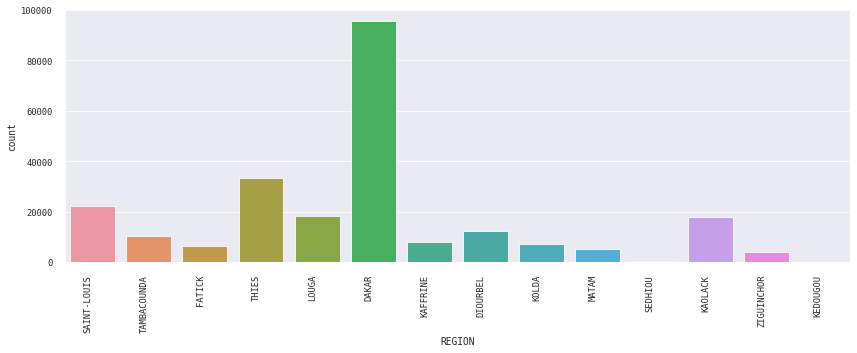

K > 24 month     379439
I 18-21 month      8312
H 15-18 month      4858
G 12-15 month      2788
J 21-24 month      2325
F 9-12 month       1771
E 6-9 month         359
D 3-6 month         148
Name: TENURE, dtype: int64


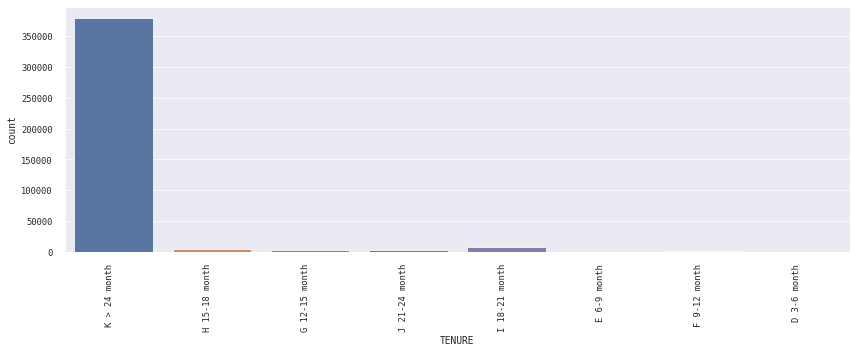

In [28]:
object_count_plot(train.drop('TOP_PACK', axis = 1))

count           259,723.0000
mean              5,522.9713
std               7,099.6406
min                  20.0000
25%               1,000.0000
50%               3,000.0000
75%               7,300.0000
max             226,550.0000
Name: MONTANT, dtype: float64


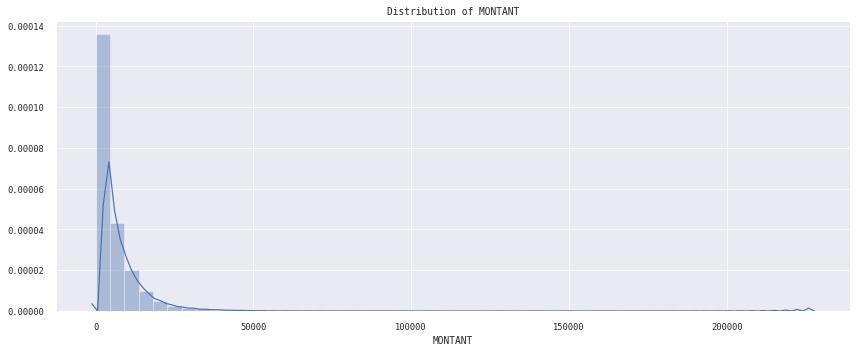

count           259,723.0000
mean                 11.5037
std                  13.2755
min                   1.0000
25%                   2.0000
50%                   6.0000
75%                  15.0000
max                 133.0000
Name: FREQUENCE_RECH, dtype: float64


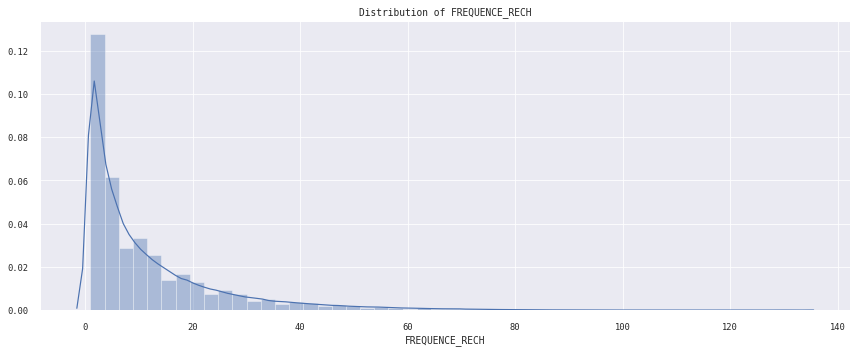

count           265,337.0000
mean              5,505.4878
std               7,175.8024
min                   1.0000
25%               1,000.0000
50%               3,000.0000
75%               7,340.0000
max             233,413.0000
Name: REVENUE, dtype: float64


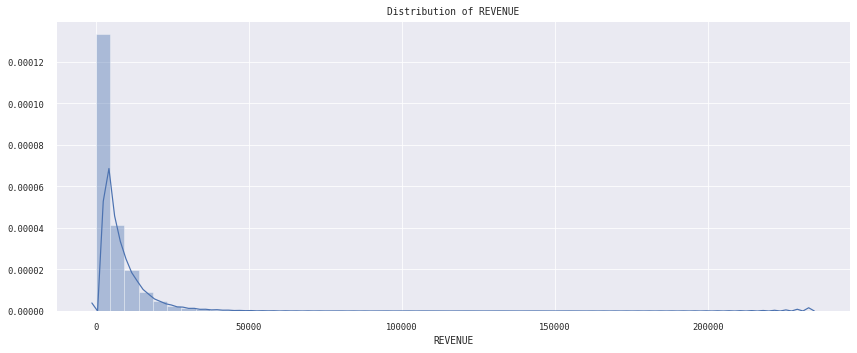

count           265,337.0000
mean              1,835.1677
std               2,391.9293
min                   0.0000
25%                 333.0000
50%               1,000.0000
75%               2,447.0000
max              77,804.0000
Name: ARPU_SEGMENT, dtype: float64


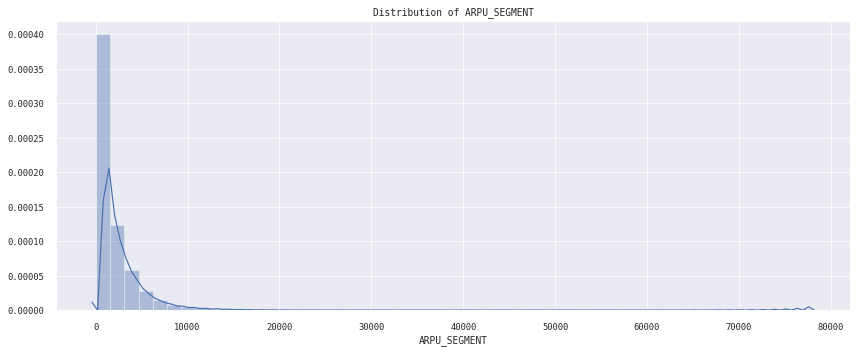

count           265,337.0000
mean                 13.9518
std                  14.6799
min                   1.0000
25%                   3.0000
50%                   9.0000
75%                  19.0000
max                  91.0000
Name: FREQUENCE, dtype: float64


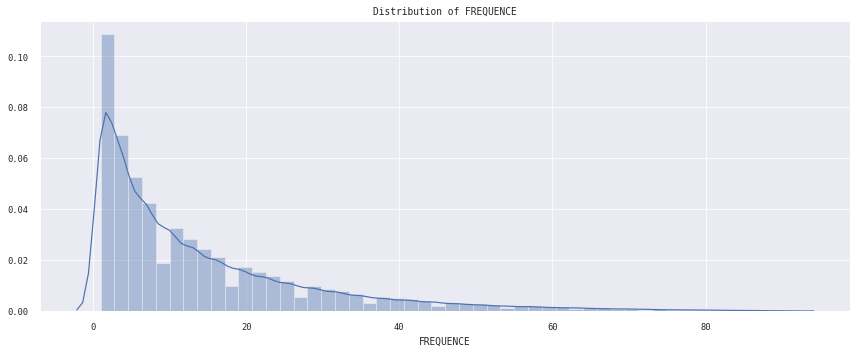

count           203,146.0000
mean              3,369.7634
std              12,281.8675
min                   0.0000
25%                   0.0000
50%                 267.0000
75%               2,925.0000
max             934,576.0000
Name: DATA_VOLUME, dtype: float64


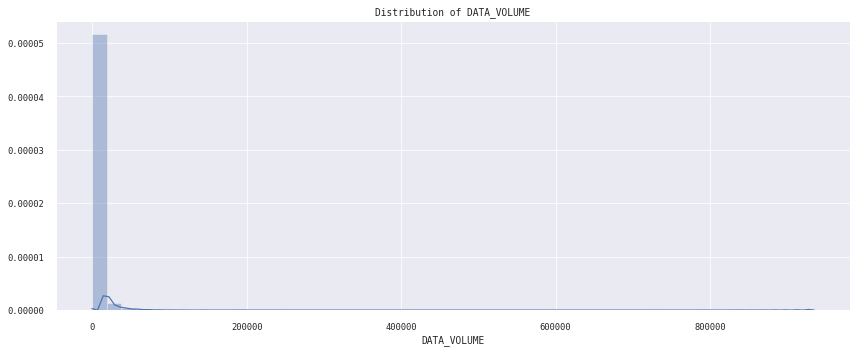

count           254,181.0000
mean                275.9176
std                 873.5930
min                   0.0000
25%                   5.0000
50%                  27.0000
75%                 155.0000
max              45,011.0000
Name: ON_NET, dtype: float64


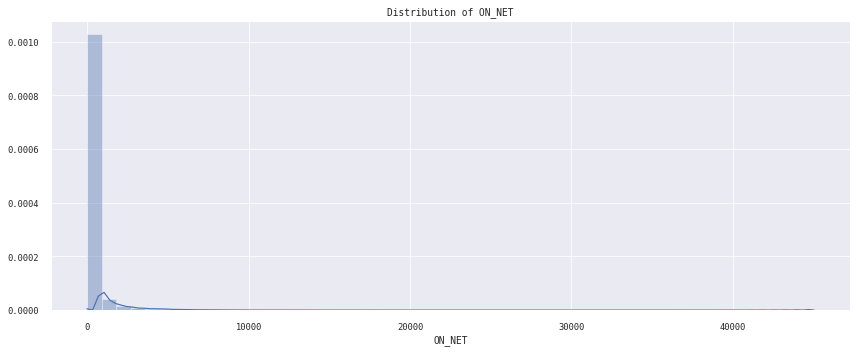

count           233,683.0000
mean                 95.5329
std                 204.7333
min                   0.0000
25%                   7.0000
50%                  29.0000
75%                  99.0000
max               6,788.0000
Name: ORANGE, dtype: float64


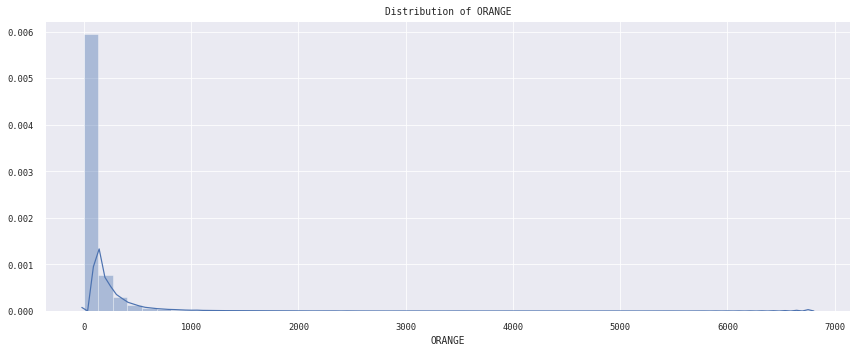

count           160,614.0000
mean                 23.1346
std                  63.0619
min                   0.0000
25%                   2.0000
50%                   6.0000
75%                  20.0000
max               2,758.0000
Name: TIGO, dtype: float64


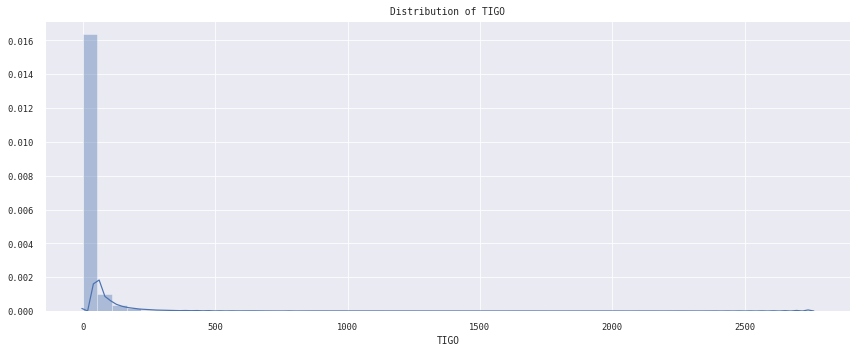

count           400,000.0000
mean                 28.0465
std                  22.2828
min                   1.0000
25%                   6.0000
50%                  24.0000
75%                  51.0000
max                  62.0000
Name: REGULARITY, dtype: float64


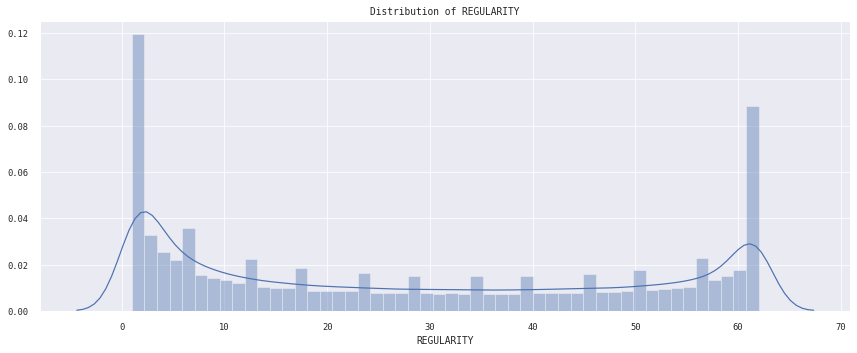

count           232,671.0000
mean                  9.2542
std                  12.3056
min                   1.0000
25%                   2.0000
50%                   5.0000
75%                  12.0000
max                 629.0000
Name: FREQ_TOP_PACK, dtype: float64


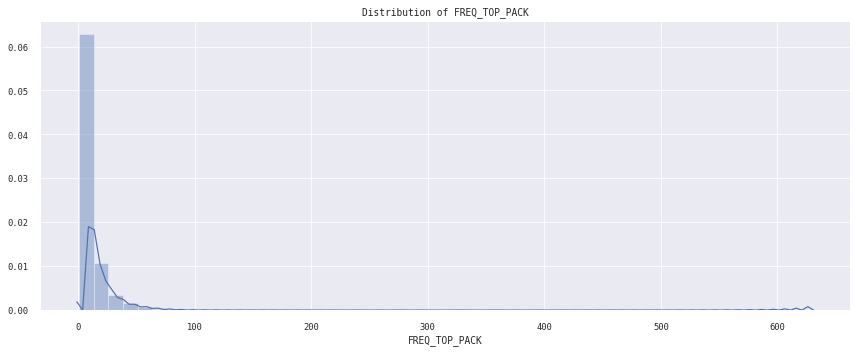

In [29]:
numeric_distribution_plot(train.drop('CHURN', axis=1))

In [30]:
from scipy.stats import skew,norm 

In [31]:
numeric = data.select_dtypes(include='number').columns
skew_features = data[numeric].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

print("There are {} numerical features with Skew > 0.5 :".format(high_skew.shape[0]))
skewness = pd.DataFrame({'Skew' :high_skew})
skew_features.head(10)

There are 10 numerical features with Skew > 0.5 :


DATA_VOLUME                   35.8214
TIGO                          18.4773
ON_NET                        10.3886
ORANGE                         9.2925
FREQ_TOP_PACK                  5.6730
MONTANT                        4.9914
ARPU_SEGMENT                   4.6683
REVENUE                        4.6683
FREQUENCE_RECH                 2.8955
FREQUENCE                      2.4513
dtype: float64

In [35]:
for column in skew_index:
    data[column] = np.log1p(data[column])


In [36]:
cat_features = data.select_dtypes(exclude=np.number).columns.drop('CHURN')

In [37]:
cat_features

Index(['REGION', 'TENURE', 'TOP_PACK'], dtype='object')

In [38]:
for col in cat_features:
    print('{} has {} unique categories'.format(col, data[col].nunique()))

REGION has 15 unique categories
TENURE has 8 unique categories
TOP_PACK has 113 unique categories


In [39]:
data = pd.get_dummies(columns= ['REGION', 'TENURE'], data = data)

In [40]:
data.head()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN,REGION_DAKAR,REGION_DIOURBEL,REGION_FATICK,REGION_KAFFRINE,REGION_KAOLACK,REGION_KEDOUGOU,REGION_KOLDA,REGION_LOUGA,REGION_MATAM,REGION_REGION_NAN,REGION_SAINT-LOUIS,REGION_SEDHIOU,REGION_TAMBACOUNDA,REGION_THIES,REGION_ZIGUINCHOR,TENURE_D 3-6 month,TENURE_E 6-9 month,TENURE_F 9-12 month,TENURE_G 12-15 month,TENURE_H 15-18 month,TENURE_I 18-21 month,TENURE_J 21-24 month,TENURE_K > 24 month
0,9.7410,3.4965,9.7982,8.6997,3.5553,5.5910,4.5850,5.8749,1.9459,62,All-net 500F=2000F;5d,3.5835,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,8.3666,3.4012,8.3957,7.2978,3.6376,7.4759,2.1972,1.3863,0.0000,40,"Data: 100 F=40MB,24H",3.1355,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,7.3139,1.3863,7.3139,6.2166,1.3863,5.5910,3.4340,3.4340,1.9459,32,All-net 500F=2000F;5d,1.3863,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,7.3139,1.3863,7.8232,6.7250,1.6094,0.0000,5.0752,3.8286,2.9957,18,On net 200F=Unlimited _call24H,1.3863,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,8.0067,2.0794,6.2126,5.1180,1.3863,0.6931,0.6931,1.3863,1.9459,50,TOP_PACK_NAN,1.7918,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [41]:
data['TOP_PACK']  = pd.factorize(data['TOP_PACK'])[0]

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 36 columns):
MONTANT                 500000 non-null float64
FREQUENCE_RECH          500000 non-null float64
REVENUE                 500000 non-null float64
ARPU_SEGMENT            500000 non-null float64
FREQUENCE               500000 non-null float64
DATA_VOLUME             500000 non-null float64
ON_NET                  500000 non-null float64
ORANGE                  500000 non-null float64
TIGO                    500000 non-null float64
REGULARITY              500000 non-null int64
TOP_PACK                500000 non-null int64
FREQ_TOP_PACK           500000 non-null float64
CHURN                   500000 non-null object
REGION_DAKAR            500000 non-null uint8
REGION_DIOURBEL         500000 non-null uint8
REGION_FATICK           500000 non-null uint8
REGION_KAFFRINE         500000 non-null uint8
REGION_KAOLACK          500000 non-null uint8
REGION_KEDOUGOU         500000 non-null 

In [43]:
train_df = data.loc[( data['CHURN'] != 'test')].reset_index(drop = True)
test_df = data.loc[( data['CHURN'] == 'test')].reset_index(drop = True)

In [44]:
train_df.shape, test.shape

((400000, 36), (100000, 15))

In [45]:
X = train_df.drop('CHURN', axis = 1)
y = train_df['CHURN'].apply(int)

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify = y,  random_state=42)

In [48]:
lr = LogisticRegression()
rf = RandomForestClassifier()
gbm = GradientBoostingClassifier()
decision_tree = DecisionTreeClassifier()

In [52]:
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
gbm.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [54]:
print('Logistic Regression Log loss: {}'.format(log_loss(y_test, lr.predict_proba(X_test)[:,1])))
print('RandomForestClassifier Log loss: {}'.format(log_loss(y_test, rf.predict_proba(X_test)[:,1])))
print('GradientBoostingClassifier Log loss: {}'.format(log_loss(y_test, gbm.predict_proba(X_test)[:,1])))
print('DecisionTreeClassifier Log loss: {}'.format(log_loss(y_test, decision_tree.predict_proba(X_test)[:,1])))

Logistic Regression Log loss: 0.26428890436055
RandomForestClassifier Log loss: 0.5453252661470424
GradientBoostingClassifier Log loss: 0.25436719488625925
DecisionTreeClassifier Log loss: 2.2802712270128964


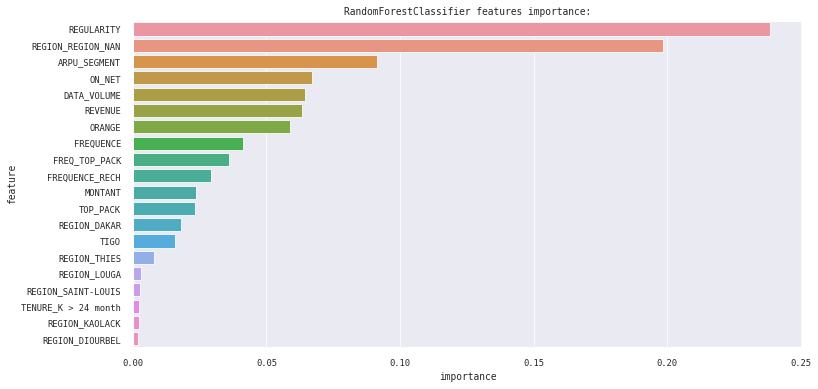

In [55]:
feature_importance_df = pd.DataFrame(rf.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = X.columns

plt.figure(figsize=(12, 6));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(20))
plt.title('RandomForestClassifier features importance:');

In [56]:
test_x = test_df.drop('CHURN', axis = 1)

In [57]:
prediction = gbm.predict_proba(test_x)[:, 1]

In [59]:

sub['CHURN'] = prediction
sub.to_csv('submission.csv', index =False)
